In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Test de l'implémentation de l'article « Playlist Prediction via Metric Embedding »
Pour l'utilisateur 000   
Un fichiers trajectoire (.plt) est l'équivalent d'une playlist   
Chaque ligne du fichiers trajectoire est l'équivalent d'une chanson   
## Chargement données

In [3]:
fichiers = ! ls "data/geolife_trajectories/sample/000/Trajectory/"
latitudes = []
longitudes = []
for trajectory in fichiers:
    latitudes_trajectoire = []
    longitudes_trajectoire = []
    with open("data/geolife_trajectories/sample/000/Trajectory/"+trajectory) as file:
        for line in file.readlines()[6:]:
            lat, lon, _, _, _, _, _ = line.strip().split(',')
            latitudes_trajectoire.append(float(lat))
            longitudes_trajectoire.append(float(lon))
    latitudes.append(latitudes_trajectoire)
    longitudes.append(longitudes_trajectoire)

In [4]:
latitudes = np.array(latitudes)
longitudes = np.array(longitudes)

## Discrétisation

In [21]:
sections = 5*10e2

In [22]:
min_lat = min(min(latitudes))
min_lon = min(min(longitudes))
max_lat = max(max(latitudes))
max_lon = max(max(longitudes))

In [23]:
lat_step = (max_lat-min_lat)/sections
lon_step = (max_lon-min_lon)/sections

In [24]:
lat_step

0.0017923541999999998

In [25]:
latitudes_d = []
longitudes_d = []
for trajectoire_lat in latitudes:
    latitudes_d.append(((np.array(trajectoire_lat)-min_lat)/lat_step).round())
    
for trajectoire_lon in longitudes:
    longitudes_d.append(((np.array(trajectoire_lon)-min_lon)/lon_step).round())

<IPython.core.display.Javascript object>


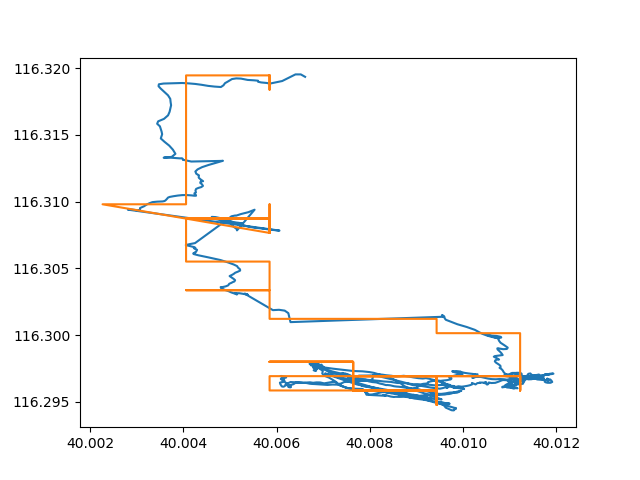

In [26]:
plt.figure(1)
plt.plot(latitudes[10], longitudes[10])
plt.plot(latitudes_d[10]*lat_step+min_lat, longitudes_d[10]*lon_step+min_lon)
plt.show()

In [27]:
mixte = []
for i in range(len(latitudes_d)):
    mixte.append(latitudes_d[i]*sections+longitudes_d[i])

**Ensemble de positions *S***

In [28]:
S = set()
for trajectoire in mixte:
    S = S.union(set(trajectoire))
len(S)

5500

Beaucoup de points => il faut faire le Landmark heuristic

## Dual-point Model
Random initializations for *U* and *V*